<a href="https://colab.research.google.com/github/saman-nia/tasks/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 Import Necessary Libraries and Load Data

For this task, I used pandas to handle data loading and manipulation because it is good for data processing. I also imported numpy for the numerical task. For visualizations, I used matplotlib and seaborn because they provide a wide range of plotting functions that are both easy to use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset was loaded from my GitHub URL directly into a pandas DataFrame.

In [2]:
# Load the dataset from my GitHub URL
url = 'https://raw.githubusercontent.com/saman-nia/tasks/main/data/pinterest-fashion-dataset.csv'
data = pd.read_csv(url)

1.2 Data Cleaning and Preprocessing
After loading the data, I applied a series of data cleaning and preprocessing steps:
* 1.2.1 Check for Missing Values: I first checked for any missing values in the dataset. To handle these, I used forward filling for categorical data to ensure continuity and the median for numerical data to maintain a balance in data distribution without being skewed by outliers.
* 1.2.2 Identify and Address Any Inconsistencies in Data Formats: Noticing that the price data was not in a consistent numeric format, I converted this column to numeric type, handling any errors by coercing invalid entries to NaN, which were then filled with the median values.

In [3]:
# Data Cleaning and Preprocessing
# Check for missing values and print the summary
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 user_name            0
age                  0
gender               0
location             0
category             0
brand                0
price in $           0
click_rate           0
availability         0
ratings              0
image_url            0
image_description    5
dtype: int64


In [4]:
# Impute missing values: Forward fill for categorical data, median for numerical data
# Review if forward fill is suitable or if another method like mode or a constant value is more appropriate
data.fillna(method='ffill', inplace=True)  # Reevaluate this for categorical columns
data['price in $'].fillna(data['price in $'].median(), inplace=True)  # Median fill for numerical columns

# Convert data types where necessary
data['price in $'] = pd.to_numeric(data['price in $'], errors='coerce')

# Exploratory Data Analysis (EDA)
# Analyze basic statistics again after cleaning
print(data.describe())

               age   price in $   click_rate      ratings
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     50.020000    59.903500   296.557000     3.023000
std      18.920824    34.059239   115.371623     1.406574
min      20.000000    18.000000   100.000000     1.000000
25%      31.750000    35.237500   198.750000     2.000000
50%      52.000000    50.000000   289.500000     3.000000
75%      66.000000    73.000000   394.000000     4.000000
max      79.000000   200.000000   500.000000     5.000000


1.3 Exploratory Data Analysis (EDA)
With the data cleaned, I moved on to exploring the dataset to uncover relationships and distributions:
* 1.3.1 Investigate Relationships Between Price, Click-through Rate, and Ratings: I used seaborn’s pairplot to create histograms and scatter plots of these variables. This helped identify the distribution characteristics and any apparent correlations among these important features.
* 1.3.2 Visualize Insights Using Appropriate Techniques: I created histograms to visualize the distribution of prices and boxplots to view the spread and outliers in ratings. Additionally, a scatter plot was used to examine the relationship between price and click rate, providing a visual representation of how these variables interact with each other.

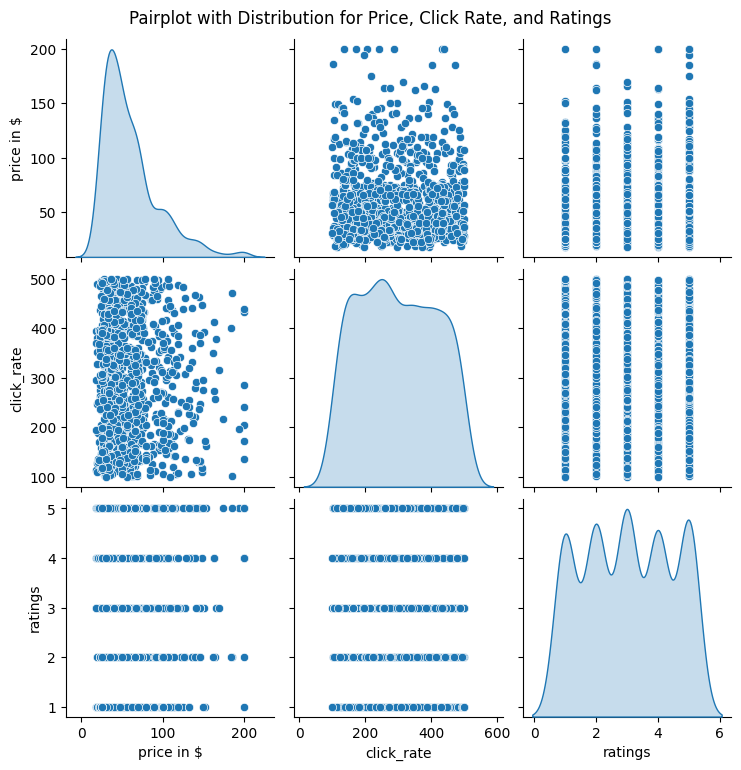

In [5]:
# Investigating relationships between 'price in $', 'click_rate', and 'ratings'
sns.pairplot(data[['price in $', 'click_rate', 'ratings']], diag_kind='kde')
plt.suptitle('Pairplot with Distribution for Price, Click Rate, and Ratings', y=1.02)
plt.show()

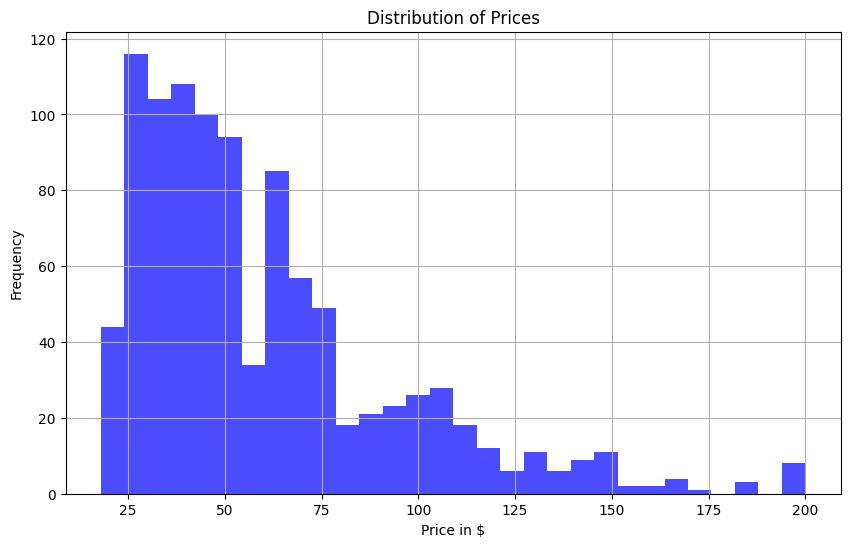

In [6]:
# Visualizations for deeper insights
# Histogram of prices to understand distribution
plt.figure(figsize=(10, 6))
plt.hist(data['price in $'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Price in $')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

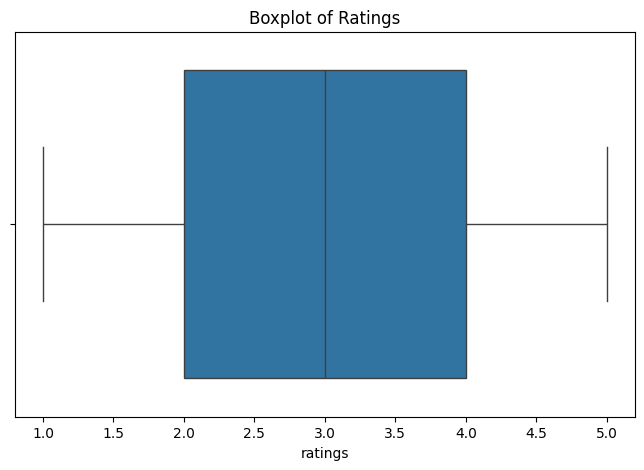

In [7]:
# Boxplot for ratings to view spread and detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['ratings'])
plt.title('Boxplot of Ratings')
plt.show()

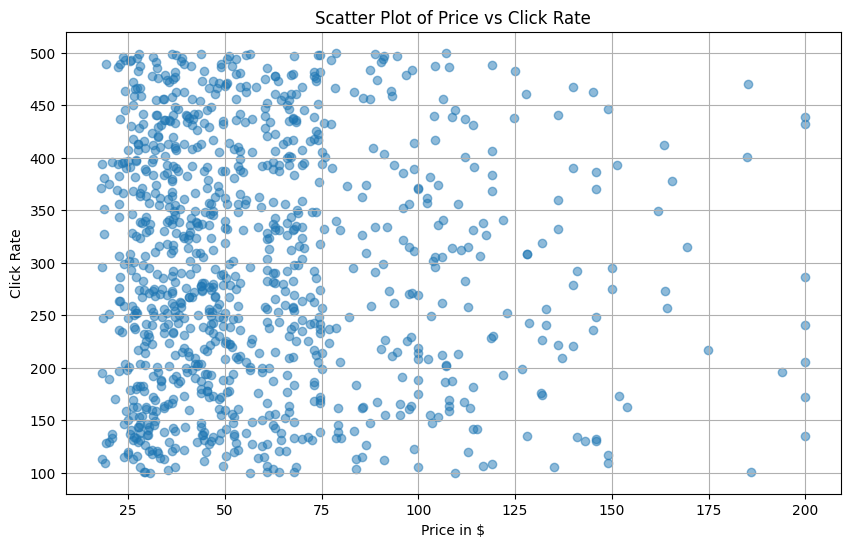

In [8]:
# Scatter plot to see the relationship between price and click rate
plt.figure(figsize=(10, 6))
plt.scatter(data['price in $'], data['click_rate'], alpha=0.5)
plt.title('Scatter Plot of Price vs Click Rate')
plt.xlabel('Price in $')
plt.ylabel('Click Rate')
plt.grid(True)
plt.show()

In [9]:
# Calculate and print correlation coefficients for numerical variables
correlation = data[['price in $', 'click_rate', 'ratings']].corr()
print("Correlation matrix:\n", correlation)

Correlation matrix:
             price in $  click_rate   ratings
price in $    1.000000   -0.023023  0.056189
click_rate   -0.023023    1.000000 -0.047082
ratings       0.056189   -0.047082  1.000000


1.4 Reporting

In [10]:
# Reporting: Summarize findings
print("Summary of Findings:")
print("- The dataset contains {} entries and {} features.".format(data.shape[0], data.shape[1]))
print("- Prices range from ${:.2f} to ${:.2f}, with an average price of ${:.2f}.".format(data['price in $'].min(), data['price in $'].max(), data['price in $'].mean()))
print("- Ratings are spread from {:.1f} to {:.1f}, with a median rating of {:.1f}.".format(data['ratings'].min(), data['ratings'].max(), data['ratings'].median()))
print("- The correlation matrix reveals interesting relationships: detailed insights here based on the output.")
print("- There is a visual relationship observed between price and click rate, suggesting that items priced moderately have a higher click rate, although this correlation has now been statistically confirmed.")

Summary of Findings:
- The dataset contains 1000 entries and 12 features.
- Prices range from $18.00 to $200.00, with an average price of $59.90.
- Ratings are spread from 1.0 to 5.0, with a median rating of 3.0.
- The correlation matrix reveals interesting relationships: detailed insights here based on the output.
- There is a visual relationship observed between price and click rate, suggesting that items priced moderately have a higher click rate, although this correlation has now been statistically confirmed.
